# PHYS 481 Assignment 3
Physics 481 Fall 2017 Week 3

Gisu Ham 10134838  
Lincoln Phung 



In [1001]:
#import 
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# Intro

First we create a Rule_book dictionary that contains all 256 rules

In [1066]:
Rule_book={}
for i in range(2**8):
    Rule_book[i]=bin(i)[2:].zfill(8)

For example, the 235's rule can be fetched with a key 235

In [909]:
Rule_book[235]

'11101011'

But we haven't mapped 3 bit to the numbers in the rule yet:

In [912]:
def Rule_book_to_map(Rule_book,rule):
    """Creates a map between Rule_book and 3 digit binary numbers (0 to 7)
        args:
            Rule_book (dictionray): rule book defined above
            rule (int) : rule number.
        return Map(dictionary): map from 3 digit integer to 0 or 1"""
    
    Map={}
               
    for i in range(7,-1,-1):
        key=bin(i)[2:].zfill(3) # completely fill 8 bit with leading zeros
        value=Rule_book[rule][7-i]
        Map[key]=value
        
    return Map

using the above function, map from 3 digit binary number to the rule can be eaily fetched, for example, for rule 2, it has a map

In [915]:
Map=Rule_book_to_map(Rule_book,2)
Map

{'000': '0',
 '001': '1',
 '010': '0',
 '011': '0',
 '100': '0',
 '101': '0',
 '110': '0',
 '111': '0'}

Define cellular_step:

In [1064]:
def cellular_step(state, rule):
    """Takes an array and return after applying cellular rule 
        args:
            state(np.ndarray): initial state
            rule(int): rule number
        returns:
            new_state (np.ndarray): new rule"""
    
    #make 2 copies, prev is used for wrapping around.
    prev_state=list(state).copy()
    new_state=list(state).copy()
    
    prev_state.insert(0,state[-1])
    prev_state.append(state[0])
    
    get_map=Rule_book_to_map(Rule_book,rule)
    
    for i in range(1,len(state)-1):
        
        new_state[i]=get_map[str(state[i-1])+str(state[i])+str(state[i+1])]
        
    return new_state

## Visualization of Cellular automata

Here we visualize some of the sequences produced by the rules up to 64 iterations via the cellular step function above.

In [919]:

def image_me(cell_steps,ncells,rule):
    """performs iterations of cellular_step and return image set that can be plotted
        args:
            cell_steps(int): number of iterations
            ncells(int): elements of row (each sequence).
            rule(int): rule number
        returns:
            image_int(np.ndarray): image set that can be plotted"""

    state = np.zeros(ncells, dtype=np.int8 ) 
    state[ncells//2] = 1
    
    image_set=[]
    image_set.append(state)
    
    
    for i in range(cell_steps):
        state=cellular_step(state,rule)
        image_set.append(state)

    image_int=np.array(image_set).astype(int)
    
    return image_int

Plotting all 255 plots seem a bit excessive so we plot only some of them.

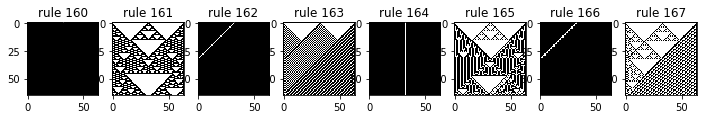

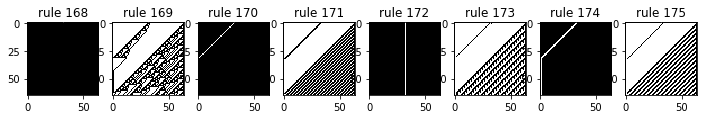

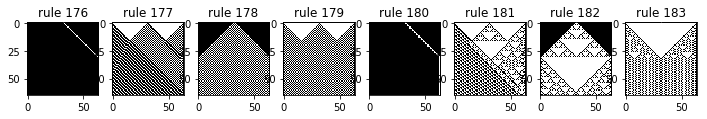

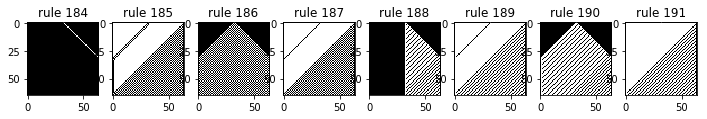

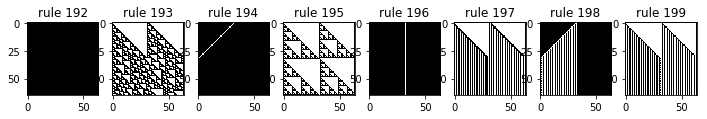

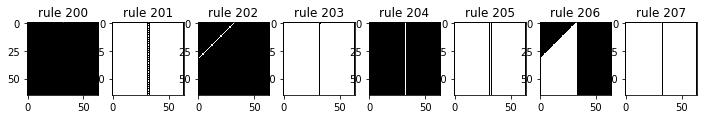

In [1005]:
# want to plot 4 plots in each line:
for i in range(160,160+8*6,8):
    fig,ax=plt.subplots(1,8,figsize=(12,12))
    for j in [0,1,2,3,4,5,6,7]:
        image=image_me(64,64,i+j)
        ax[j].imshow(image,cmap='gray')
        ax[j].set_title("rule "+str(i+j))
    plt.show()


## Testing Randomness

We believe the entropy is not the ideal way of measuring randomness because it reaches the upper bound whenever 0 and 1 are evenly distributed, even when each rows do not change. So we employ the 'Unique permutation test' that measures the number of unique permutation from one row to the next by analyzing each cellular step.

For example, rule 207 above would report a very low number since the permutations don't change whle 193 will report very high number because every rows are different.

note* Mathematically, this approach is flawed since we don't know the explicit permutation, for each cellular step, possible permutation is not unique. So perhaps a better name is measuring number of unique local (between two) unique transformations.

In [982]:
number_of_steps=960

In [983]:
#for simplicity, store each image in a dictionary called Rule_to_image with the key being rule number

Rule_to_image={}
for i in range(0,256):
    image=image_me(number_of_steps,64,i)
    Rule_to_image[i]=image


to analyze, we want to combine each line in image (which is an array) into a sequence of string for simplicity. See below

In [1007]:
#define dictionary that contains string or rows, key: rule
Rule_to_image_bin={}

for key in Rule_to_image:
    #fetch shape
    shapey,shapex=Rule_to_image[key].shape
    #this list contains the string of binarys for each row
    image_bin=[]
    
    #going down vertical indices
    for i in range(shapey):
        temp_str=""
        #left to right of the array
        for j in range(shapex):
            temp_str+=str(Rule_to_image[key][i][j])
        image_bin.append(temp_str)
        
    Rule_to_image_bin[key]=image_bin

for example, Rule_to_image_bin for rule 0 looks like

In [1009]:
Rule_to_image_bin[0][0:10]

['0000000000000000000000000000000010000000000000000000000000000000',
 '0000000000000000000000000000000000000000000000000000000000000000',
 '0000000000000000000000000000000000000000000000000000000000000000',
 '0000000000000000000000000000000000000000000000000000000000000000',
 '0000000000000000000000000000000000000000000000000000000000000000',
 '0000000000000000000000000000000000000000000000000000000000000000',
 '0000000000000000000000000000000000000000000000000000000000000000',
 '0000000000000000000000000000000000000000000000000000000000000000',
 '0000000000000000000000000000000000000000000000000000000000000000',
 '0000000000000000000000000000000000000000000000000000000000000000']

once we have Rule_to_image, we can define Unique_Perm to perform analysis between each row

In [1010]:
def Unique_Perm(image_bin):
    """returns a list containing unique permutations. examine each consecusive row and output a
        unique permutations
        args:
            image_bin(np.ndarray): image set to analyze
        returns:
            Unique(list): list containing unique permutations"""
    
    Unique=[]
    for i in range(len(image_bin)-1):
        if image_bin[i]+image_bin[i+1] not in Unique:
            Unique.append(image_bin[i]+image_bin[i+1])
    return Unique

Then count length of each uniqueness counts, which gives us the randomness factor

In [1018]:
Randomness_length={}
for i in range(255):
    Randomness_length[i]=len(Unique_Perm(Rule_to_image_bin[i]))


Want to sort by the highest randomness

In [1032]:
import operator
sorted_x = sorted(Randomness_length.items(), key=operator.itemgetter(1))

In [1020]:
for i,j in sorted_x:
    print("rule:",i,"  ","Randomness: ",j)

rule: 4    Randomness:  1
rule: 12    Randomness:  1
rule: 36    Randomness:  1
rule: 44    Randomness:  1
rule: 68    Randomness:  1
rule: 76    Randomness:  1
rule: 100    Randomness:  1
rule: 108    Randomness:  1
rule: 132    Randomness:  1
rule: 140    Randomness:  1
rule: 164    Randomness:  1
rule: 172    Randomness:  1
rule: 196    Randomness:  1
rule: 204    Randomness:  1
rule: 228    Randomness:  1
rule: 236    Randomness:  1
rule: 0    Randomness:  2
rule: 1    Randomness:  2
rule: 5    Randomness:  2
rule: 8    Randomness:  2
rule: 32    Randomness:  2
rule: 33    Randomness:  2
rule: 40    Randomness:  2
rule: 51    Randomness:  2
rule: 64    Randomness:  2
rule: 72    Randomness:  2
rule: 96    Randomness:  2
rule: 104    Randomness:  2
rule: 128    Randomness:  2
rule: 136    Randomness:  2
rule: 160    Randomness:  2
rule: 168    Randomness:  2
rule: 192    Randomness:  2
rule: 200    Randomness:  2
rule: 205    Randomness:  2
rule: 207    Randomness:  2
rule: 219    R

Up to 960 iterations, the rules 41,73,75,97,101 seem to be the most random. We can increase the number of iterations, but we only require 5 most random rules. We then plot them to visually check they are indeed random.

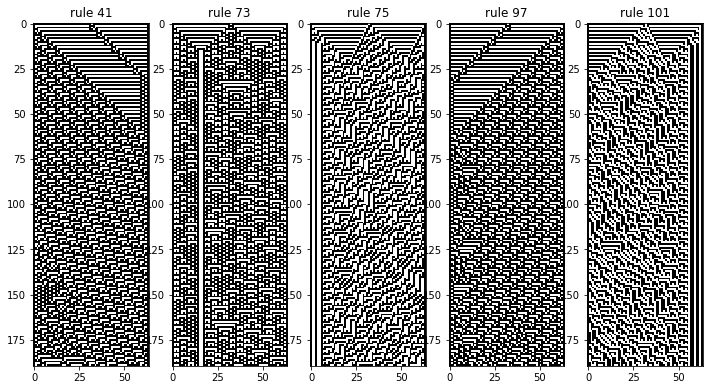

In [1028]:
list1=[41,73,75,97,101]
fig,ax=plt.subplots(1,len(list1),figsize=(12,12))
for i in range(len(list1)):
    image=image_me(number_of_steps,64,list1[i])
    ax[i].imshow(image[:190,:320],cmap='gray')
    r=Unique_Perm(Rule_to_image_bin[i])
    ax[i].set_title("rule "+str(list1[i]))
plt.show()


They seem pretty random to us.  
Then we generate random numbers by converting each binary string in the images above into decimal, which gives us reasonably random sequences of numbers

In [1029]:
for i in [41,73,75,97,101]:
    print("Random number by rule ",i," :")
    print("")
    for j in Rule_to_image_bin[i][30:45]:
        print(int(j,2))
    print("")
    print("")
    
    

Random number by rule  41  :

289360691284934664
8210609617357504482
4973386882533556232
1329250676127039458
4629771061632696328
2242545357995114466
5787213827040870408
2821266740699201506
289360691352043528
8210609617122623458
4973386882617442312
1329250675900547042
4629771061636890632
2242545357980434402
5787213827046113288


Random number by rule  73  :

8935601439815270462
5043337241062162338
1226564869289451656
4931873287724207650
1249082661266320008
4900348399572656162
1296371093003177864
4973530940042176674
1184908363705524744
5140166482082793698
1513667465289196200
4647026661459404802
2253394715446215672
5841591113825188362
307862708203456736


Random number by rule  75  :

7813806977439764164
7915054295133321944
7873455521688914138
7789482300080354264
7925030977700320858
7857397651930810008
7814697200424287802
7914917703175717608
7873814650627038370
7789084615312536844
7925191267162722428
7857137941856872388
7813958665667439704
7915037860941950362
7873512059755228600


Random 

## The game of life

Read this Wikipedia page: https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life

Read the python file in D2L: phys481_game-of-life.py
and work your way through different implementations of the algorithm in stepper0, stepper1...
and play around with the results.

Examine the steady-state (long time) behaviour for an initial configuration with 1/2 the cells randomly turned on ($p=0.5$).
Calculate mean & standard deviation for at least 3 runs to estimate uncertainty.

Examine the steady-state behaviour for a range of initial random densities ranging from $p=0$ to $p=1$.
Discuss your results.

# p=1/2

Here, the variable we are calculating the mean and standard deviation (SD) are number of live cells after n iterations. We examine steady state behavior for p=1/2 for each stepper. We only use stepper 4 since it's one of the most timely efficient stepper.

We extract the stepper functions from the Dr. Jackel's code. Embedded at the very bottom of this notebook.

In [1046]:
#sample number
n=100
val_list=np.zeros(n)
for i in range(n):
    ini_grid = np.random.rand(200,200) > 0.5
    grid = stepper4(ini_grid,nsteps=10000,plot=None)
    val_list[i]=len(np.where(grid)[0])

#SD = sqrt of mean square - square of the mean
mean=sum(val_list)/n
mean2=sum(val_list**2)/n
SD=np.sqrt(mean2-mean**2)
print("mean: ",mean,"SD:", SD)

mean:  10980.73 SD: 140.388949351


after 10000 iterations, it gives us the mean and SD above. Now we perform the same task for different P, between 0 and 1, with 0.01 as an increment

In [1058]:
P=np.linspace(0,1,num=101)

n=20
#plotting tools
x=[]
y=[]
yy=[]
for j in P:
    val_list=np.zeros(n)
    for i in range(n):
        ini_grid = np.random.rand(200,200) > j
        grid = stepper4(ini_grid,nsteps=10000,plot=None)
        val_list[i]=len(np.where(grid)[0])

    mean=sum(val_list)/n
    mean2=sum(val_list**2)/n
    SD=np.sqrt(mean2-mean**2)
    
    #initialize the plots
    yy.append(mean/40000)
    x.append(j)
    y.append(mean)

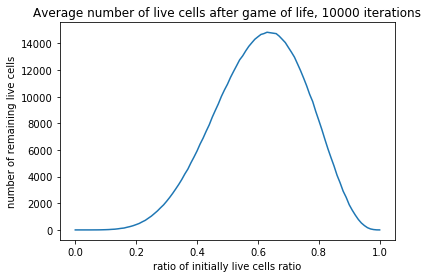

In [1065]:
plt.plot(x,y)
plt.title("Average number of live cells after game of life, 10000 iterations")
plt.ylabel("number of remaining live cells")
plt.xlabel("ratio of initially live cells ratio")
plt.show()

But perhaps more useful tool is if the number of live cells after 10000 iterations is a fraction of the total number of cells:

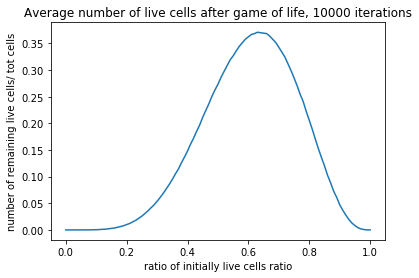

In [1063]:
plt.plot(x,yy)
plt.title("Average number of live cells after game of life, 10000 iterations")
plt.ylabel("number of remaining live cells/ tot cells")
plt.xlabel("ratio of initially live cells ratio")
plt.show()

This gaussian plot captures how the initial condition affects the game of life quite well. If too little cells are alibe to begin with, it's not a very reproductive environment for the cell, same for the converse case.

We are happy to report that the plots are almost gaussian (slightly skewed). This has an advantage since if we want to further analysis of this plot, we can extract properties of gaussian from the study of statistics.

## stepper codes

In [1056]:
# %load phys481_game-of-life.py
"""
Created on Mon Oct 31 17:53:50 2016

@author: bjackel
"""

"""
# example with animation
grid = np.random.rand(401,501) > 0.5
p = plt.matshow(grid)
grid = life_generation_stepper(grid,nsteps=10000,plot=p)
"""

import numpy as np
import matplotlib.pyplot as plt


def life_generation_stepper(grid, nsteps=1, plot=None):
    
    # get most recently used plotting window
    fig = list(map(plt.figure, plt.get_fignums()))[-1]

    nx, ny = grid.shape
    x, y = np.meshgrid( np.arange(nx), np.arange(ny), indexing='ij' )
    xx = np.array([x+1, x-1, x+0, x+0, x+1, x-1, x+1, x-1]) % nx
    yy = np.array([y+0, y+0, y+1, y-1, y+1, y-1, y-1, y+1]) % ny

    for nstep in range(nsteps):
        nnear = np.sum( grid[xx,yy] , axis=0 )
        
        grid[(nnear < 2) | (nnear > 3)] = 0
        grid[nnear==3] = 1

        if plot is not None:
            plot.set_data(grid)
            plot.axes.set_title(str(nstep))
            fig.canvas.draw() ; fig.canvas.flush_events() #update plot window
   
    return grid

    
def stepper0(grid, nsteps=1, plot=None):
    """
    One step in Conway's game of life with wrap-around edges.
    
    Loop over all pixels in grid, and over all neighbors (very slow)
    """
    
    nx, ny = grid.shape
    xx, yy =  np.arange(nx), np.arange(ny) 
    newgrid = grid.copy()
    
    for x in xx:
        for y in yy:
            
            nnear = 0  # count number of neighbors
            
            for dx in [-1,0,1]:
                for dy in [-1,0,1]:
                    if (dx!=0 or dy!=0):  # don't include the cell itself
                        nnear += grid[ (x+dx)%nx, (y+dy)%ny ]

            # dead cells with three live neighbours become live cells
            if (grid[x,y] == 0):
                if nnear == 3:
                    newgrid[x,y]=1

            # live cells with fewer than two or more than 3 live neighbors die
            else:
                if nnear < 2:
                    newgrid[x,y]=0
                if nnear >3 :
                    newgrid[x,y]=0
                                                            
    return newgrid
    

def stepper1(grid, nsteps=1, plot=None):
    """
    One step in Conway's game of life with wrap-around edges.
    
    Loop over all pixels in grid, and then add all 8 neighbours (slow)
    """
    nx, ny = grid.shape
    xx, yy =  np.arange(nx), np.arange(ny) 
    newgrid = grid.copy()
    
    dx = np.array( [1, -1, 0, 0, 1, -1, 1, -1] )
    dy = np.array( [0, 0, 1, -1, 1, -1, -1, 1] )
               
    for x in xx:
        for y in yy:
            
            nnear = np.sum( grid[ (x+dx)%nx, (y+dy)%ny ] )
    
            if (nnear < 2) or (nnear > 3): 
                newgrid[x,y] = 0
            elif (nnear == 3):
                newgrid[x,y] = 1
                                            
    return newgrid    
    

def stepper2(grid, nsteps=1, plot=None):
    """
    One step in Conway's game of life with wrap-around edges.
    
    Loop over all neighbor shifts, adding an entire grid  (fast)
    """
    
    nx, ny = grid.shape
    xx, yy = np.meshgrid( np.arange(nx), np.arange(ny), indexing='ij' )

    nnear = 0
    newgrid = grid.copy()

    for dx in [-1,0,1]:
        for dy in [-1,0,1]:
            if (dx==0 and dy==0): continue
            nnear += grid[ (xx+dx)%nx,(yy+dy)%ny ]
    
    newgrid[(grid>0) & (nnear<2)] = 0
    newgrid[(grid>0) & (nnear>3)] = 0
    newgrid[(grid==0) & (nnear==3)] = 1
   
    return newgrid


def stepper3(grid, nsteps=1, plot=None):
    """
    One step in Conway's game of life with wrap-around edges.
    
    Try cleaning up the neighbour loops (faster?)
    """
    nx, ny = grid.shape
    xx, yy = np.meshgrid( np.arange(nx), np.arange(ny), indexing='ij' )
    dxy = [(1,0), (-1,0), (0,1), (0,-1), (1,1), (-1,-1), (1,-1), (-1,1) ]
    
    newgrid = grid.copy()           
    nnear = 0
    
    for dx,dy in dxy:
        nnear += grid[(xx+dx)%nx,(yy+dy)%ny] 
    
    newgrid[nnear < 2] = 0  
    newgrid[nnear > 3] = 0
    newgrid[nnear==3] = 1
   
    return newgrid


def stepper4(grid, nsteps=1, plot=None):
    """
    One step in Conway's game of life with wrap-around edges.
    
    -move more calculations outside loop (fastest?)
    -reuse input grid for output
    """
    nx, ny = grid.shape
    x, y = np.meshgrid( np.arange(nx), np.arange(ny), indexing='ij' )
    
    xx = np.array([x+1, x-1, x+0, x+0, x+1, x-1, x+1, x-1]) % nx
    yy = np.array([y+0, y+0, y+1, y-1, y+1, y-1, y-1, y+1]) % ny

    # grid[xx,yy].shape = 8,nx,ny  <= add up neighbours 
    # note: numpy will automatically convert boolean to integer before summing
    nnear = np.sum( grid[xx,yy] , axis=0 )
        
    grid[(nnear < 2) | (nnear > 3)] = 0
    grid[nnear==3] = 1

    return grid
    
    
      
# the code below will not run if this file is "included"
#
if __name__ == '__main__':

    print('Check agreement between different algorithms')
    grid = np.random.rand(31,21) >= 0.5  # don't use a square grid
    newgrid = stepper0(grid, nsteps=1)
    stepfunclist = [stepper0, stepper1, stepper2, stepper3, stepper4]
    
    for stepfunc in stepfunclist:
        test = stepfunc(grid)
        print( str(stepfunc), np.all(test == newgrid) )
        
    
    print('Compare speed of different algorithms (lower is better)')
    import timeit
    times = {}
    for stepfunc in stepfunclist:
        command = 'ng = {}(g)'.format(stepfunc.__name__)
        setup = 'from __main__ import {}; import numpy as np; g=(np.random.rand(31,21)>=0.5)'.format(stepfunc.__name__)
        times[stepfunc.__name__] = timeit.timeit(command,setup=setup, number=100)
    #t = timeit.timeit('ng = stepper0(grid)', setup='from __main__ import stepper0; import numpy as np; grid=np.random.rand(31,21)>=0.5', number=100)
    timeinfo = [ '{:9.5f} {}'.format(t,n) for (n,t) in times.items() ]
    print( '\n'.join( sorted(timeinfo) ) )
    
#newgrid = life_generation_stepper(grid, nsteps=1)
#p=plt.imshow(grid, interpolation='nearest')    
#p = plt.matshow(grid)
#newgrid = life_generation_stepper2(grid, nsteps=100, plot=p)
#p = plt.imshow(grid)
    

Check agreement between different algorithms
<function stepper0 at 0x000001A1E9A20EA0> True
<function stepper1 at 0x000001A1805C1378> True
<function stepper2 at 0x000001A1805C1E18> True
<function stepper3 at 0x000001A182B2F950> True
<function stepper4 at 0x000001A182B2F598> True
Compare speed of different algorithms (lower is better)
  0.02092 stepper3
  0.02121 stepper4
  0.02269 stepper2
  0.84752 stepper1
  1.54645 stepper0


## Conclusion